In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
mydata = pd.read_csv("train.csv")

# Data Cleaning

In [3]:
mydata

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [4]:
mydata.isnull().sum() # checking for nan values.

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
mydata.drop_duplicates(inplace=True) # dropping the duplicate values from dataset


In [6]:
mydata

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [7]:
mydata["Sex"] = mydata["Sex"].map({"male":0,"female":1}) #converting string to numeric datatype

In [8]:
mydata

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0


In [9]:
(mydata.iloc[:,0:]==0).sum() # checking each of them if anything in dataset seems to be zero , if it comes out to be zero then we well drop it..

id                 1
Sex           374279
Age                0
Height             0
Weight             0
Duration           0
Heart_Rate         0
Body_Temp          0
Calories           0
dtype: int64

Boxplots BEFORE removing outliers:


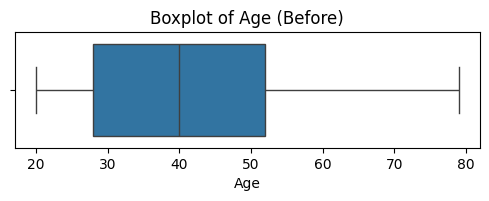

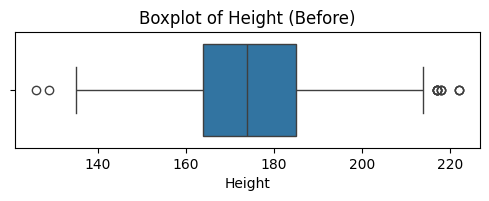

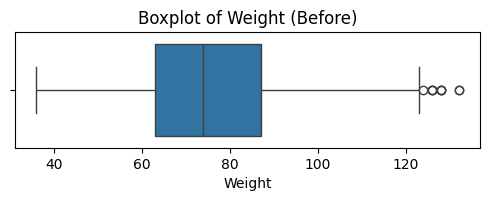

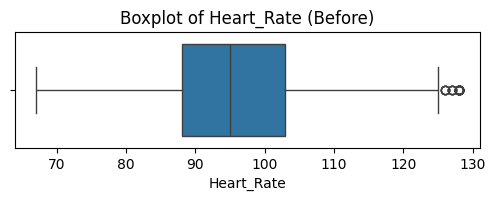

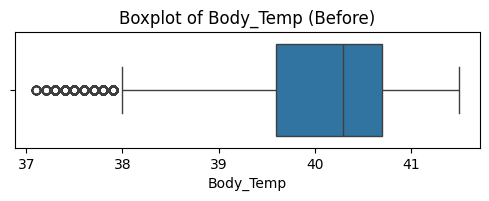


Outliers before cleaning:
Age: 0 outliers
Height: 14 outliers
Weight: 9 outliers
Heart_Rate: 36 outliers
Body_Temp: 14919 outliers

Outliers after cleaning:
Age: 0 outliers
Height: 0 outliers
Weight: 0 outliers
Heart_Rate: 101 outliers
Body_Temp: 7852 outliers

Boxplots AFTER removing outliers:


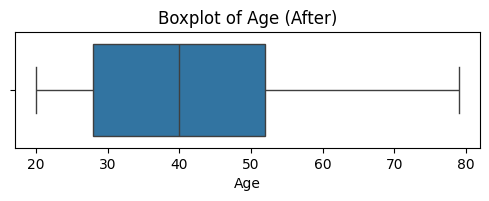

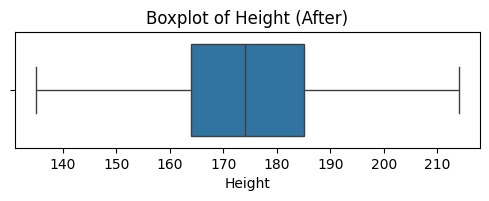

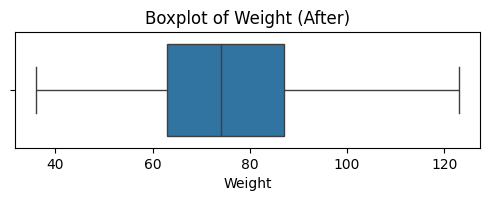

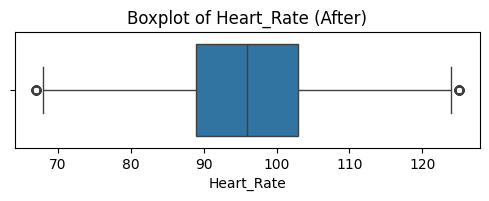

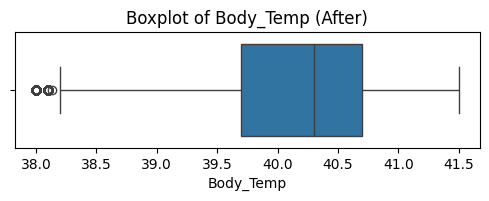

In [10]:

numeric_cols = ['Age', 'Height', 'Weight', 'Heart_Rate', 'Body_Temp']

# 1. Boxplots BEFORE removing outliers
print("Boxplots BEFORE removing outliers:")
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=mydata[col])
    plt.title(f'Boxplot of {col} (Before)')
    plt.show()

# 2. Detecting outliers before cleaning
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

print("\nOutliers before cleaning:")
for col in numeric_cols:
    outliers = detect_outliers_iqr(mydata, col)
    print(f"{col}: {len(outliers)} outliers")

# 3. Remove outliers
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Chain removal for all numeric columns
for col in numeric_cols:
    mydata = remove_outliers_iqr(mydata, col)

# 4. Detecting outliers after cleaning
print("\nOutliers after cleaning:")
for col in numeric_cols:
    outliers = detect_outliers_iqr(mydata, col)
    print(f"{col}: {len(outliers)} outliers")

# 5. Boxplots AFTER removing outliers
print("\nBoxplots AFTER removing outliers:")
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=mydata[col])
    plt.title(f'Boxplot of {col} (After)')
    plt.show()


In [11]:

print(f"Rows after cleaning: {mydata.shape[0]}")


Rows after cleaning: 735027


In [12]:
mydata # after removing outliers

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0


In [13]:
# feature engineering , adding a one more extra column named BMI to help model undertand further.
mydata['Height_m'] = mydata['Height'] / 100
mydata['BMI'] = mydata['Weight'] / (mydata['Height_m'] ** 2)
mydata.drop(columns='Height_m', inplace=True)  # Optional: remove intermediate column


In [14]:
mydata

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740
...,...,...,...,...,...,...,...,...,...,...
749995,749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0,26.040968
749996,749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0,23.140496
749997,749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0,25.529645
749998,749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0,27.472527


In [15]:
mydata

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740
...,...,...,...,...,...,...,...,...,...,...
749995,749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0,26.040968
749996,749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0,23.140496
749997,749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0,25.529645
749998,749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0,27.472527


In [16]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

mydata['BMI_Category'] = mydata['BMI'].apply(bmi_category)


In [17]:
mydata

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI_Category
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684,Normal
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709,Normal
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405,Normal
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062,Normal
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740,Normal
...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0,26.040968,Overweight
749996,749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0,23.140496,Normal
749997,749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0,25.529645,Overweight
749998,749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0,27.472527,Overweight


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mydata['BMI_Category_Encoded'] = le.fit_transform(mydata['BMI_Category'])


In [19]:
mydata

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI_Category,BMI_Category_Encoded
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684,Normal,0
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709,Normal,0
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405,Normal,0
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062,Normal,0
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0,26.040968,Overweight,2
749996,749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0,23.140496,Normal,0
749997,749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0,25.529645,Overweight,2
749998,749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0,27.472527,Overweight,2


In [20]:
mydata.drop(columns="BMI_Category",inplace=True)

In [21]:
# use scaling if you are using Linear based models., here we are using tree based model hence we are not using standardscalr
mydata

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,BMI_Category_Encoded
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684,0
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709,0
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405,0
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062,0
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740,0
...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,0,28,193.0,97.0,30.0,114.0,40.9,230.0,26.040968,2
749996,749996,1,64,165.0,63.0,18.0,92.0,40.5,96.0,23.140496,0
749997,749997,0,60,162.0,67.0,29.0,113.0,40.9,221.0,25.529645,2
749998,749998,0,45,182.0,91.0,17.0,102.0,40.3,109.0,27.472527,2


In [22]:
corrmatrix = mydata.corr()
corrmatrix["Calories"].sort_values(ascending=False)

Calories                1.000000
Duration                0.959340
Heart_Rate              0.907336
Body_Temp               0.840817
Age                     0.144222
BMI                     0.051159
BMI_Category_Encoded    0.048477
Weight                  0.020401
id                      0.001377
Height                  0.000813
Sex                    -0.015791
Name: Calories, dtype: float64

In [23]:
y = mydata.iloc[0:,-3] #dependent feature
x = mydata.drop(columns="Calories") # independent features
y

0         150.0
1          34.0
2          29.0
3         140.0
4         146.0
          ...  
749995    230.0
749996     96.0
749997    221.0
749998    109.0
749999    103.0
Name: Calories, Length: 735027, dtype: float64

# Cleaning is done, now training and testing the dataset

In [24]:
xtrain = x
ytrain = y
model = RandomForestRegressor()
model.fit(xtrain,ytrain)


RandomForestRegressor()

In [40]:
# 11. Predict on a new sample
sample = pd.DataFrame([{
    'id':11,
    'Sex': 0,
    'Age': 62,
    'Height': 164,
    'Weight': 60,
    'Duration': 30,
    'Heart_Rate': 90,
    'Body_Temp': 46,
    'BMI': 25,
    'BMI_Category_Encoded': 90
}])


predicted_calorie = model.predict(sample)
print(f"\nPredicted calorie: {int(predicted_calorie[0])}")



Predicted calorie: 185
